# ECSE 415 - Assignment 5:  Segmentation
## Theo Ghanem 260972584

Note that parts of this assignment have been taken/inspired from the following sources:
- Tutorials
- PyTorch documentation
- StackOverflow
- Generative AI
- Class lectures

## Part 1 - K-Means and Mean-Shift Clustering for Segmentation

### 1.Compute  the  features  of  the Dog.jpg  and Person.jpg images  by  convolving  the  images with the two Haar filter kernels shown below. 
The white areas of the Haar filter kernel all have a  weight  of  +1,  while  the  black  areas  have  a  weight  of -1.  For  the  purposes  of  obtaining the convolution  values  for  pixels  near  the  border  of  the  image,  assume  that  the  intensity values of pixels outside the borders of the image are 0. You could use the integral image technique to implement the Haar filtering in a more computationally efficient (i.e. faster)manner.Display the filtered feature images

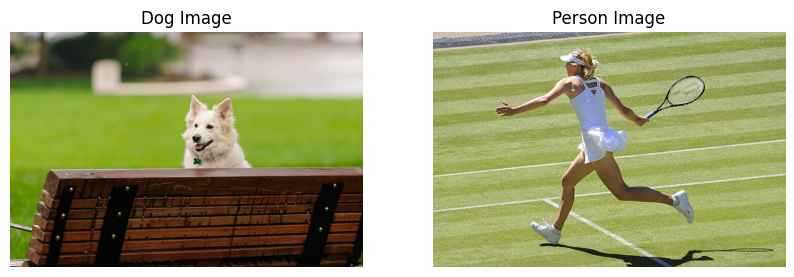

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Load image Google Drive
image_path = '/content/drive/My Drive/ECSE415_computer_vision/A5/'
# image_path = "/Users/theog/Documents/CodingProjects/ECSE415_Computer_Vision/Assignments/A5"
dog_image = cv2.imread(image_path + "/Part 1/Dog.jpg")
person_image = cv2.imread(image_path + "/Part 1/Person.jpg")

# show both images next to each other:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB))
plt.title("Dog Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(person_image, cv2.COLOR_BGR2RGB))
plt.title("Person Image")
plt.axis('off')
plt.show()

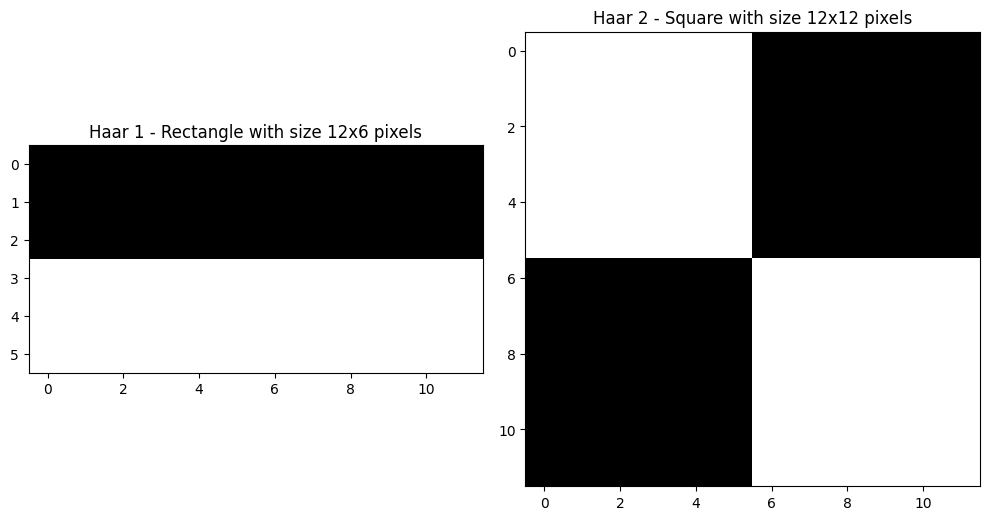

In [3]:
# Define Haar1 filter (rectangle 12x6)
haar1_top = -1 * np.ones((3, 12))  # White top rectangle
haar1_bottom = np.ones((3, 12))  # Black bottom rectangle
haar1 = np.vstack((haar1_top, haar1_bottom)) # Combined 

# Define Haar2 filter (square 12x12)
haar2_top_left = np.ones((6, 6))
haar2_top_right = -1 * np.ones((6, 6))
haar2_bottom_left = -1 * np.ones((6, 6))
haar2_bottom_right = np.ones((6, 6))

# combine the 4 quadrants
haar2_top = np.hstack((haar2_top_left, haar2_top_right))
haar2_bottom = np.hstack((haar2_bottom_left, haar2_bottom_right))
haar2 = np.vstack((haar2_top, haar2_bottom))

# Plot filters
plt.figure(figsize=(10, 5))  # Adjust figure size for two subplots

# Subplot 1: Haar1
plt.subplot(1, 2, 1)
plt.imshow(haar1, cmap='gray')
plt.title('Haar 1 - Rectangle with size 12x6 pixels')

# Subplot 2: Haar2
plt.subplot(1, 2, 2)
plt.imshow(haar2, cmap='gray')
plt.title('Haar 2 - Square with size 12x12 pixels')

plt.tight_layout()  # Adjust spacing between subplots for better visualization
plt.show()

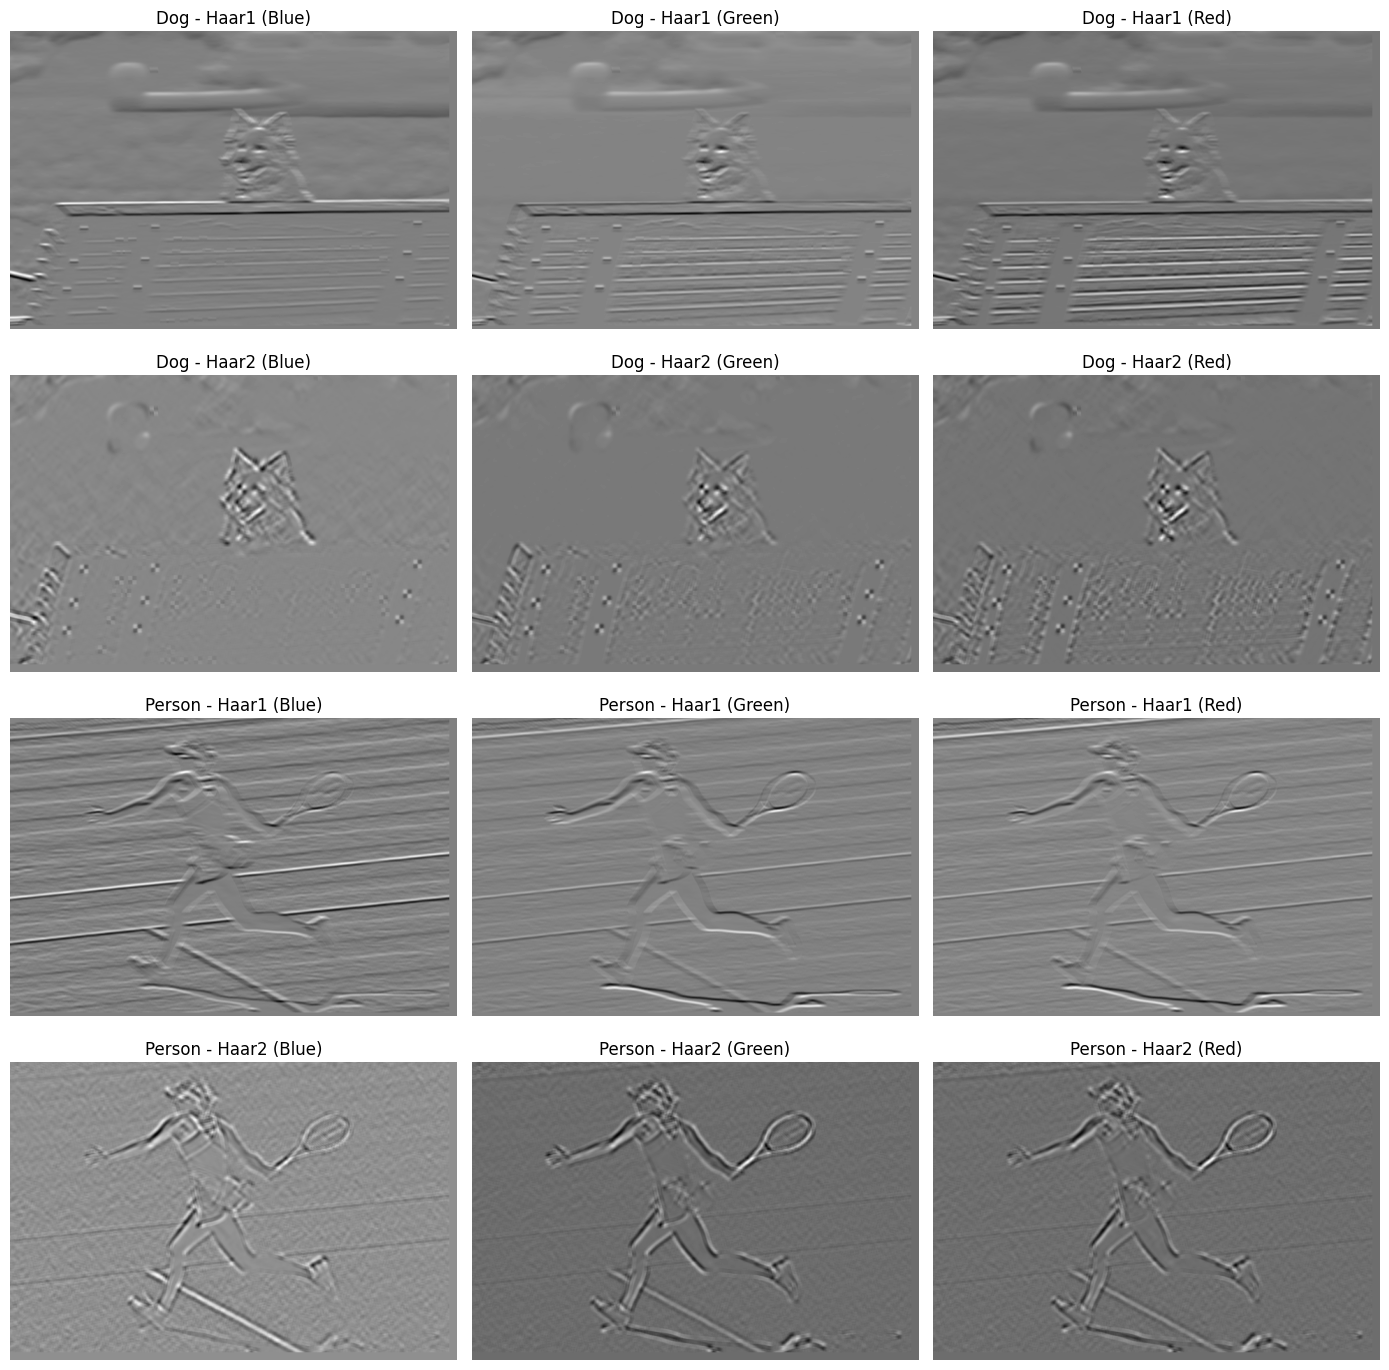

In [5]:
def convolve_haar(image, haar_filter):
    gray_image = image
    # Initialize output image
    output_image = np.zeros_like(gray_image, dtype=np.float32)
    # Get image dimensions
    image_height, image_width = gray_image.shape
    # Get filter dimensions
    filter_height, filter_width = haar_filter.shape
    # Loop through image
    for i in range(image_height - filter_height + 1):
        for j in range(image_width - filter_width + 1):
            # Get region of interest
            roi = gray_image[i:i + filter_height, j:j + filter_width]
            # Compute convolution
            output_image[i, j] = np.sum(roi * haar_filter)
    return output_image

def convolve_haar_color_channels(image, haar_filter):
    # Separate color channels
    blue, green, red = cv2.split(image)

    # Convolve each channel separately
    blue_output = convolve_haar(blue, haar_filter)
    green_output = convolve_haar(green, haar_filter)
    red_output = convolve_haar(red, haar_filter)

    return blue_output, green_output, red_output

# Convolve with Haar1 for each color channel
dog_haar1_blue, dog_haar1_green, dog_haar1_red = convolve_haar_color_channels(dog_image, haar1)
person_haar1_blue, person_haar1_green, person_haar1_red = convolve_haar_color_channels(person_image, haar1)

# Convolve with Haar2 for each color channel
dog_haar2_blue, dog_haar2_green, dog_haar2_red = convolve_haar_color_channels(dog_image, haar2)
person_haar2_blue, person_haar2_green, person_haar2_red = convolve_haar_color_channels(person_image, haar2)

# Display filtered feature images (adjusted for all color channels)
plt.figure(figsize=(14, 14))  # Larger figure for more subplots

# Subplots for Dog.jpg with Haar1 and Haar2 for each color channel
plt.subplot(4, 3, 1)
plt.imshow(dog_haar1_blue, cmap='gray')
plt.title('Dog - Haar1 (Blue)')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(dog_haar1_green, cmap='gray')
plt.title('Dog - Haar1 (Green)')
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(dog_haar1_red, cmap='gray')
plt.title('Dog - Haar1 (Red)')
plt.axis('off')

plt.subplot(4, 3, 4)
plt.imshow(dog_haar2_blue, cmap='gray')
plt.title('Dog - Haar2 (Blue)')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.imshow(dog_haar2_green, cmap='gray')
plt.title('Dog - Haar2 (Green)')
plt.axis('off')

plt.subplot(4, 3, 6)
plt.imshow(dog_haar2_red, cmap='gray')
plt.title('Dog - Haar2 (Red)')
plt.axis('off')

# Subplots for Person.jpg with Haar1 and Haar2 for each color channel (adjust titles accordingly)
plt.subplot(4, 3, 7)
plt.imshow(person_haar1_blue, cmap='gray')
plt.title('Person - Haar1 (Blue)')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.imshow(person_haar1_green, cmap='gray')
plt.title('Person - Haar1 (Green)')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(person_haar1_red, cmap='gray')
plt.title('Person - Haar1 (Red)')
plt.axis('off')

plt.subplot(4, 3, 10)
plt.imshow(person_haar2_blue, cmap='gray')
plt.title('Person - Haar2 (Blue)')
plt.axis('off')

plt.subplot(4, 3, 11)
plt.imshow(person_haar2_green, cmap='gray')
plt.title('Person - Haar2 (Green)')
plt.axis('off')

plt.subplot(4, 3, 12)
plt.imshow(person_haar2_red, cmap='gray')
plt.title('Person - Haar2 (Red)')
plt.axis('off')

plt.tight_layout()
plt.show()

### 2. Implement the K-means clustering to compute the segmentation of the Dog.jpg and the Person.jpg image with Haar features. 
Set K=3. Display the segmented images.

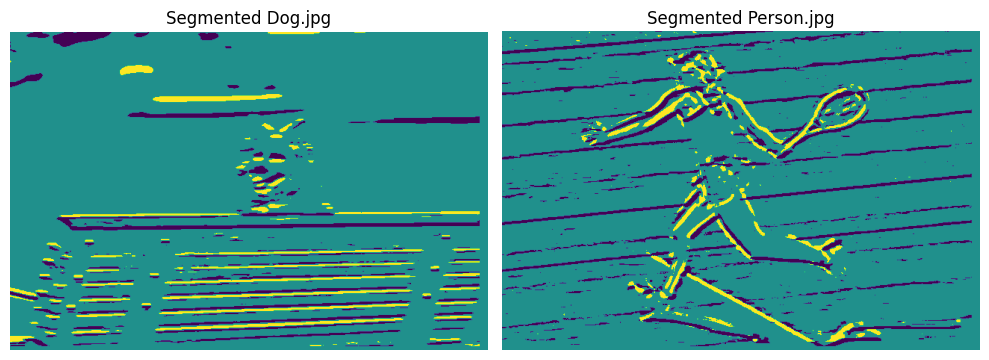

In [6]:
from sklearn.cluster import KMeans

def segment_image(image, haar1, haar2, n_clusters=3):
    """Segments an image using K-means clustering on combined Haar features."""

    # Convolve with Haar filters for each color channel
    blue1, green1, red1 = convolve_haar_color_channels(image, haar1)
    blue2, green2, red2 = convolve_haar_color_channels(image, haar2)

    # Combine features into a 6D feature vector per pixel
    features = np.stack((blue1.flatten(), green1.flatten(), red1.flatten(),
                         blue2.flatten(), green2.flatten(), red2.flatten()), axis=1)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)

    # Reshape labels to image dimensions
    segmented_image = kmeans.labels_.reshape(image.shape[0], image.shape[1])

    return segmented_image

segmented_dog = segment_image(dog_image, haar1, haar2)
segmented_person = segment_image(person_image, haar1, haar2)

# Display segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(segmented_dog)
plt.title('Segmented Dog.jpg')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_person)
plt.title('Segmented Person.jpg')
plt.axis('off')

plt.tight_layout()
plt.show()

### 3. Implement the Mean-shift clustering to compute the segmentation of the Dog.jpg and Person.jpg images. 
Display the segmented images.

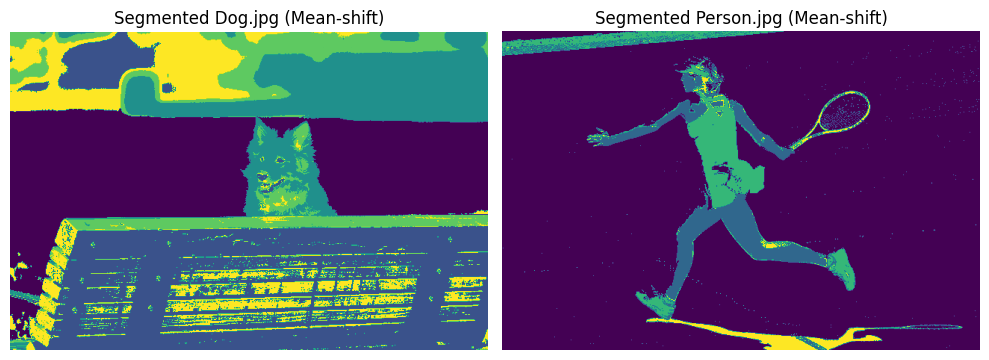

In [8]:
from sklearn.cluster import MeanShift

def mean_shift_segmentation(images):
    segmented_images = []
    for image in images:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

        # Reshape pixels for clustering
        pixels = image.reshape((-1, 3))

        # Perform Mean-shift clustering
        ms = MeanShift(bandwidth=25, bin_seeding=True)
        labels = ms.fit_predict(pixels)

        # Reshape labels to image dimensions
        segmented_image = labels.reshape(image.shape[:2])
        segmented_images.append(segmented_image)
    return segmented_images

images = [dog_image, person_image]
# Segment all images at once
segmented_images = mean_shift_segmentation(images)

# Display segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(segmented_images[0])
plt.title('Segmented Dog.jpg (Mean-shift)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_images[1])
plt.title('Segmented Person.jpg (Mean-shift)')
plt.axis('off')

plt.tight_layout()
plt.show()

#### 4. Discuss the benefits and limitations of these clustering methods for image segmentation.

